In [1]:
### Ensemble 9
### Including prokaryotes and trying different parameter combinations of µ0, m_l, m_q, kldoc_p, phi and ligphi
### Duration: 10000 years
### beta = 1E9
### 324 runs

In [2]:
### Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl

from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm
from matplotlib.cm import ScalarMappable

plt.rcParams['text.usetex'] = True

# Enable the use of LaTeX for rendering text labels
mpl.rcParams['text.usetex'] = True

# Set the font family to sans-serif (Helvetica, Arial, etc.)
mpl.rcParams['font.family'] = 'sans-serif'

# Set the font style for the labels (optional)
mpl.rcParams['font.style'] = 'normal'

# Add a LaTeX preamble to change font family for numbers to sans-serif
mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'


os.getcwd()


'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble9'

# Data import and first inspection

In [3]:
data = pd.read_csv('Ensemble9.csv', sep=' ')

In [4]:
data.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,40000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2099.323692,2354.305404,2398.631501,2388.076851,2399.467321,284.335764,264.646510,634.402837,0.0,323.0
1,40001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2099.511092,2354.678867,2398.392485,2387.986308,2399.399780,284.042704,265.014012,637.159431,0.0,323.0
2,40002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2099.103619,2356.752642,2398.425999,2387.852932,2399.298781,284.454670,264.588950,650.942987,0.0,323.0
3,40003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2101.561417,2347.988552,2399.847481,2390.032396,2400.659014,283.715211,265.596321,589.602592,0.0,323.0
4,40004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2101.109181,2349.627045,2399.573361,2389.672107,2400.384994,283.873212,265.364529,600.638387,0.0,323.0


In [5]:
data.shape

(324, 45)

In [6]:
### Add column

data['fe_lim_p(1)'] = (data['Fe(1)'] / (data['Fe(1)'] + data['kfe_p'] * 1e6)) / (data['LDOC(1)'] / (data['LDOC(1)'] + data['kldoc_p'] * 1e3)) < 1
data['fe_lim_p(2)'] = (data['Fe(2)'] / (data['Fe(2)'] + data['kfe_p'] * 1e6)) / (data['LDOC(2)'] / (data['LDOC(2)'] + data['kldoc_p'] * 1e3)) < 1
data['fe_lim_p(3)'] = (data['Fe(3)'] / (data['Fe(3)'] + data['kfe_p'] * 1e6)) / (data['LDOC(3)'] / (data['LDOC(3)'] + data['kldoc_p'] * 1e3)) < 1

In [7]:
data.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit,fe_lim_p(1),fe_lim_p(2),fe_lim_p(3)
0,40000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2388.076851,2399.467321,284.335764,264.646510,634.402837,0.0,323.0,True,True,True
1,40001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2387.986308,2399.399780,284.042704,265.014012,637.159431,0.0,323.0,True,True,True
2,40002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2387.852932,2399.298781,284.454670,264.588950,650.942987,0.0,323.0,True,True,False
3,40003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2390.032396,2400.659014,283.715211,265.596321,589.602592,0.0,323.0,True,True,True
4,40004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.001025,...,2389.672107,2400.384994,283.873212,265.364529,600.638387,0.0,323.0,True,True,True


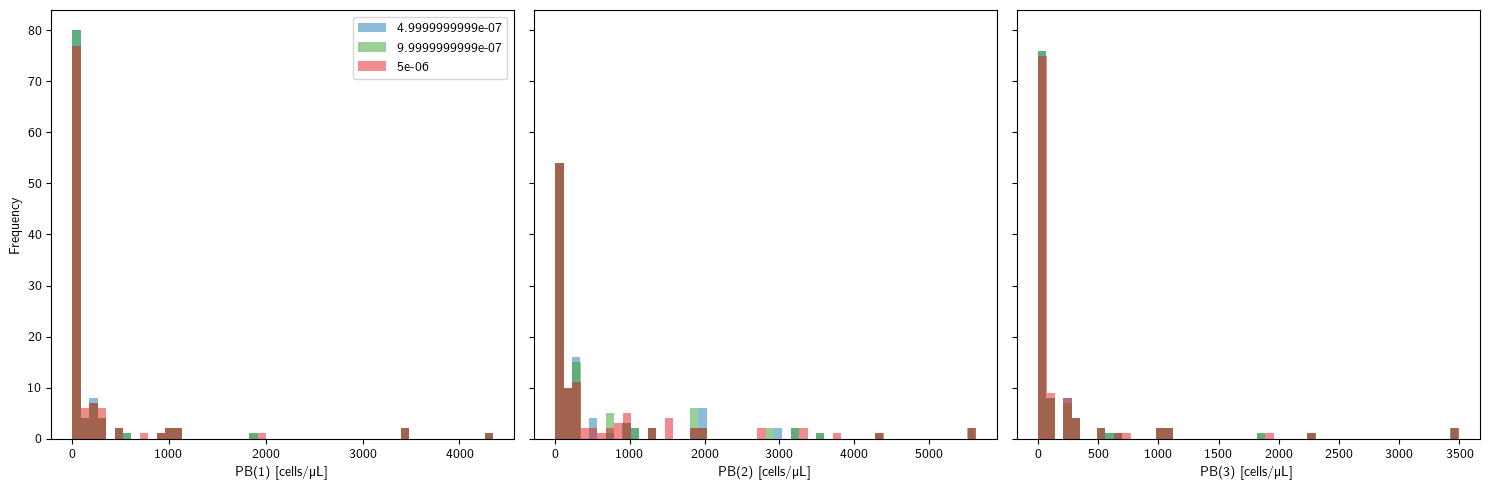

In [8]:
### Plot histograms of the ouput variables: PB(1), PB(2), PB(3)
### Put into 3 plots in one subplot

# custom_cmap = ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'])
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a']
ligphi_unique = data['ligphi'].unique()

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)
for i in range(len(ligphi_unique)):
    subset_data = data[data['ligphi'] == ligphi_unique[i]]

    axs[0].hist(subset_data['PB(1)'], bins=50, color=colors[i], alpha=0.5, label=ligphi_unique[i])
    axs[1].hist(subset_data['PB(2)'], bins=50, color=colors[i], alpha=0.5, label=ligphi_unique[i])
    axs[2].hist(subset_data['PB(3)'], bins=50, color=colors[i], alpha=0.5, label=ligphi_unique[i])


axs[0].set_xlabel('PB(1) [cells/µL]')
axs[1].set_xlabel('PB(2) [cells/µL]')
axs[2].set_xlabel('PB(3) [cells/µL]')
axs[0].set_ylabel('Frequency')
axs[0].legend()




Text(0.5, 0, 'Lig(3) [nmol/L]')

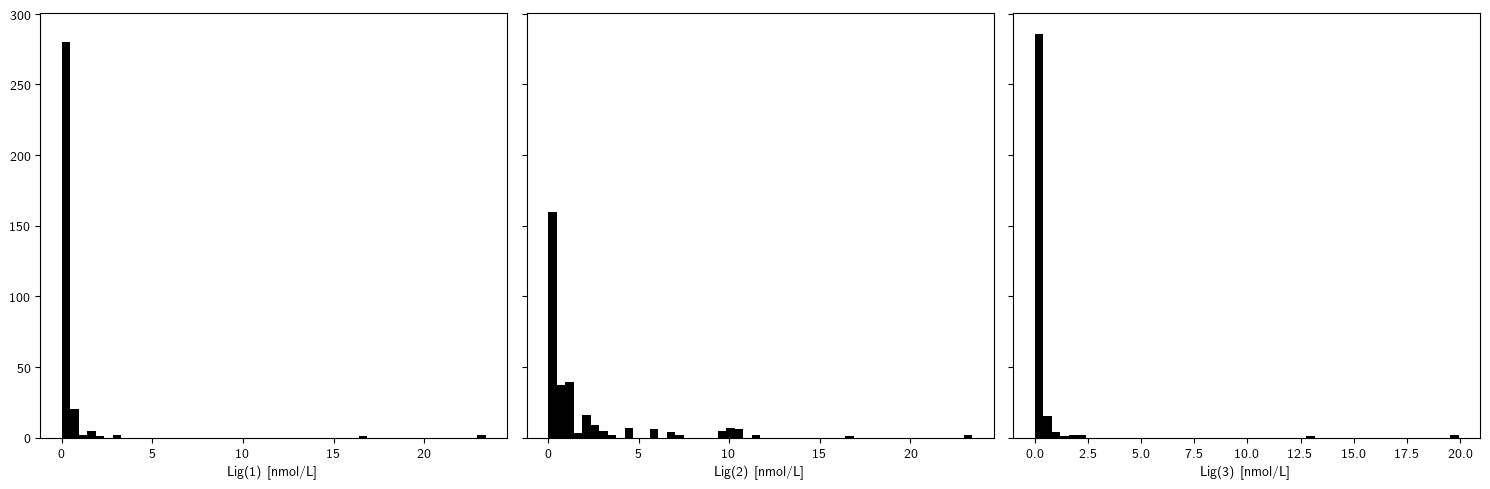

In [9]:
### Plot histograms of the ouput variables: Lig(1), Lig(2), Lig(3)
### Put into 3 plots in one subplot

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)
axs[0].hist(data['Lig(1)'], bins=50, color='black')
axs[0].set_xlabel('Lig(1) [nmol/L]')

axs[1].hist(data['Lig(2)'], bins=50, color='black')
axs[1].set_xlabel('Lig(2) [nmol/L]')

axs[2].hist(data['Lig(3)'], bins=50, color='black')
axs[2].set_xlabel('Lig(3) [nmol/L]')



Text(0.5, 0, 'Fe(3) [nmol/L]')

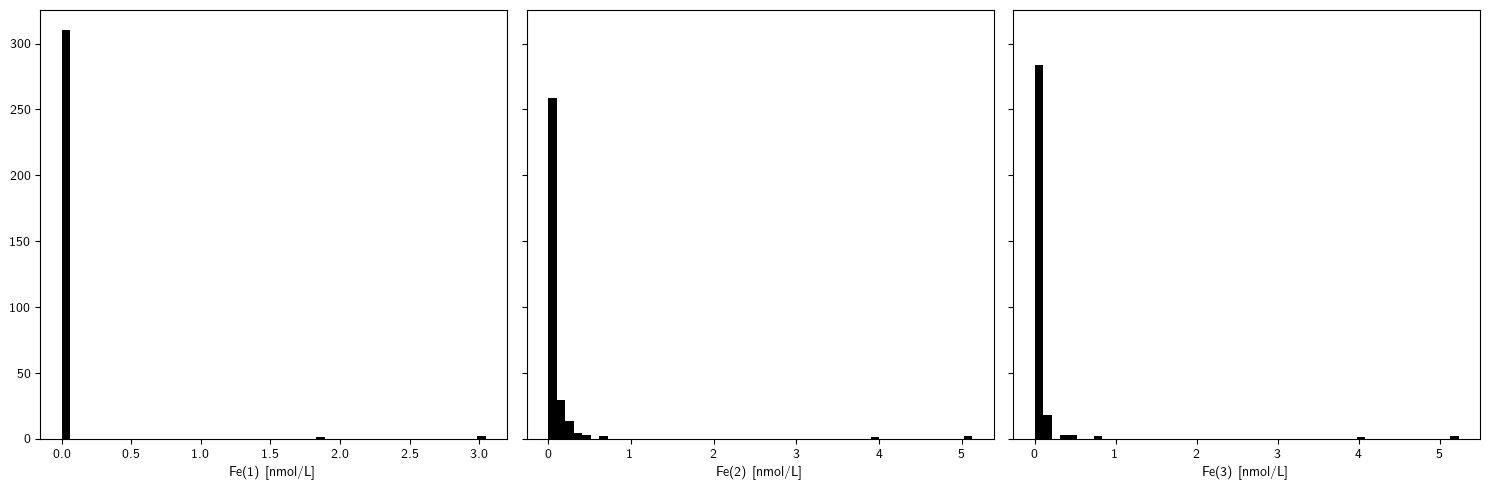

In [10]:
### Plot histograms of the ouput variables: Fe(1), Fe(2), Fe(3)
### Put into 3 plots in one subplot

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)
axs[0].hist(data['Fe(1)'], bins=50, color='black')
axs[0].set_xlabel('Fe(1) [nmol/L]')

axs[1].hist(data['Fe(2)'], bins=50, color='black')
axs[1].set_xlabel('Fe(2) [nmol/L]')

axs[2].hist(data['Fe(3)'], bins=50, color='black')
axs[2].set_xlabel('Fe(3) [nmol/L]')





In [11]:
### create a pandas dataframe where the the different rows are sorted by Fe(3) value, highest to lowest
### only columns of interest are Fe(1), Fe(2), Fe(3), PB(1), PB(2) PB(3), Lig(1), Lig(2), Lig(3), LDOC(1), LDOC(2), LDOC(3), mu0, m_l, m_q, kldoc_p, phi, ligphi, fe_lim_p(1), fe_lim_p(2), fe_lim_p(3)
### only select those columns from the original dataframe
### View the top 15 rows
### show all columns
pd.set_option('display.max_columns', None)

data_sorted = data.sort_values(by=['Fe(3)'], ascending=False)
data_sorted = data_sorted[['Fe(1)', 'Fe(2)', 'Fe(3)', 'PB(1)', 'PB(2)', 'PB(3)', 'Lig(1)', 'Lig(2)', 'Lig(3)', 'LDOC(1)', 'LDOC(2)', 'LDOC(3)', 'mu0', 'm_l', 'm_q', 'kldoc_p', 'phi', 'ligphi', 'fe_lim_p(1)', 'fe_lim_p(2)', 'fe_lim_p(3)']]
data_sorted.head(15)




,Fe(1),Fe(2),Fe(3),PB(1),PB(2),PB(3),Lig(1),Lig(2),Lig(3),LDOC(1),LDOC(2),LDOC(3),mu0,m_l,m_q,kldoc_p,phi,ligphi,fe_lim_p(1),fe_lim_p(2),fe_lim_p(3)
29,3.047216,5.127035,5.235336,0.000000e+00,0.000000e+00,0.000000e+00,23.399080,23.416686,19.929156,1.104912,1.104948,1.097972,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,False,False,False
47,3.041879,5.121701,5.230010,0.000000e+00,0.000000e+00,0.000000e+00,23.379270,23.396876,19.909326,1.103563,1.103598,1.096623,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,False,False,False
11,1.859485,3.942136,4.045513,1.285194e-02,1.328879e-02,1.271154e-02,16.489633,16.480878,13.027818,1.124186,1.124212,1.117248,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,False,False,False
46,0.003608,0.685245,0.762347,4.905551e-02,5.366196e-02,1.450925e-01,2.093993,3.469337,1.811355,1.152805,1.167259,1.149663,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,1.000000e-06,True,False,False
28,0.003485,0.666989,0.736907,6.608835e-02,7.252444e-02,1.952331e-01,1.857017,3.252083,1.573795,1.149195,1.164206,1.145866,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,1.000000e-06,True,False,False
10,0.002388,0.422447,0.508099,5.334901e-09,5.850584e-09,1.567792e-08,1.788739,3.381857,1.631095,1.124581,1.140512,1.123005,1.157407e-07,1.157407e-08,0.0,0.010245,0.00001,1.000000e-06,True,False,False
20,0.002071,0.337904,0.441215,1.258313e-05,7.831028e-05,3.765901e-05,2.951997,11.323103,2.275800,0.116418,0.133166,0.115066,1.157407e-07,1.157407e-08,0.0,0.001025,0.00001,5.000000e-06,True,False,False
38,0.002041,0.331470,0.434736,1.161575e-05,7.232403e-05,3.475309e-05,2.909331,11.311213,2.243454,0.116301,0.133111,0.114970,1.157407e-07,1.157407e-08,0.0,0.001025,0.00001,5.000000e-06,True,False,False
209,0.001630,0.265046,0.347173,4.127937e-03,8.539528e-02,1.095463e-02,1.515747,6.962275,0.954360,0.101382,0.117540,0.100254,1.157407e-06,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,True,False,False
191,0.001628,0.264838,0.346930,4.131697e-03,8.541878e-02,1.096530e-02,1.514244,6.961260,0.953232,0.101379,0.117539,0.100252,1.157407e-06,1.157407e-08,0.0,0.010245,0.00001,5.000000e-06,True,False,False


In [12]:
# The highest Fe concentrations in the deep ocean all lead to very low PB concentrations in general
# Conditions where ligand concentrations are reasonable: Indices 46, 28, 10
# All have mu0 = 1.157E-7 s-1 = 0.01 d-1, phi=1E-5, ligphi=1E-6
1.157e-7 * (86400)

0.00999648

In [13]:
### select all rows where PB(3) > 1 and PB(2) > 100

data_sorted_pb = data[(data['PB(3)'] > 1) & (data['PB(2)'] > 100)].sort_values(by=['PB(2)'], ascending=True)
data_sorted_pb = data_sorted_pb[['Fe(1)', 'Fe(2)', 'Fe(3)', 'PB(1)', 'PB(2)', 'PB(3)', 'Lig(1)', 'Lig(2)', 'Lig(3)', 'LDOC(1)', 'LDOC(2)', 'LDOC(3)', 'mu0', 'm_l', 'm_q', 'kldoc_p', 'phi', 'ligphi', 'fe_lim_p(1)', 'fe_lim_p(2)', 'fe_lim_p(3)']]
data_sorted_pb.head(50)



,Fe(1),Fe(2),Fe(3),PB(1),PB(2),PB(3),Lig(1),Lig(2),Lig(3),LDOC(1),LDOC(2),LDOC(3),mu0,m_l,m_q,kldoc_p,phi,ligphi,fe_lim_p(1),fe_lim_p(2),fe_lim_p(3)
93,0.000036,0.003304,0.000994,111.004368,127.906077,113.131918,2.464193e-03,0.475699,1.301309e-03,0.197345,2.136604,1.932905e-01,1.157407e-07,1.157407e-10,0.0,0.001025,0.00100,5.000000e-07,True,True,True
102,0.000036,0.003304,0.000994,111.004368,127.906077,113.131918,2.464193e-03,0.475699,1.301309e-03,0.197345,2.136604,1.932905e-01,1.157407e-07,1.157407e-10,0.0,0.010245,0.00100,5.000000e-07,True,True,True
103,0.000036,0.003304,0.000994,111.014298,127.919815,113.141637,3.564579e-03,0.928002,1.301154e-03,0.102561,2.041965,9.849460e-02,1.157407e-07,1.157407e-10,0.0,0.010245,0.00100,1.000000e-06,True,True,True
94,0.000036,0.003304,0.000994,111.014298,127.919815,113.141637,3.564579e-03,0.928002,1.301154e-03,0.102561,2.041965,9.849460e-02,1.157407e-07,1.157407e-10,0.0,0.001025,0.00100,1.000000e-06,True,True,True
95,0.000036,0.003305,0.000994,111.023949,127.932852,113.150697,1.066794e-02,4.538863,1.300896e-03,0.024120,1.963645,2.003145e-02,1.157407e-07,1.157407e-10,0.0,0.001025,0.00100,5.000000e-06,True,True,True
104,0.000036,0.003305,0.000994,111.023949,127.932852,113.150697,1.066794e-02,4.538863,1.300896e-03,0.024120,1.963645,2.003145e-02,1.157407e-07,1.157407e-10,0.0,0.010245,0.00100,5.000000e-06,True,True,True
138,0.000036,0.003304,0.000983,112.271878,128.419288,114.358552,2.429963e-03,0.474240,1.270839e-03,0.193221,2.132875,1.892057e-01,1.157407e-07,1.157400e-12,0.0,0.010245,0.00100,5.000000e-07,True,True,True
129,0.000036,0.003304,0.000983,112.271878,128.419288,114.358552,2.429963e-03,0.474240,1.270839e-03,0.193221,2.132875,1.892057e-01,1.157407e-07,1.157400e-12,0.0,0.001025,0.00100,5.000000e-07,True,True,True
130,0.000036,0.003304,0.000983,112.277095,128.426987,114.363553,3.524843e-03,0.925578,1.270806e-03,0.100415,2.040219,9.638788e-02,1.157407e-07,1.157400e-12,0.0,0.001025,0.00100,1.000000e-06,True,True,True
139,0.000036,0.003304,0.000983,112.277095,128.426987,114.363553,3.524843e-03,0.925578,1.270806e-03,0.100415,2.040219,9.638788e-02,1.157407e-07,1.157400e-12,0.0,0.010245,0.00100,1.000000e-06,True,True,True


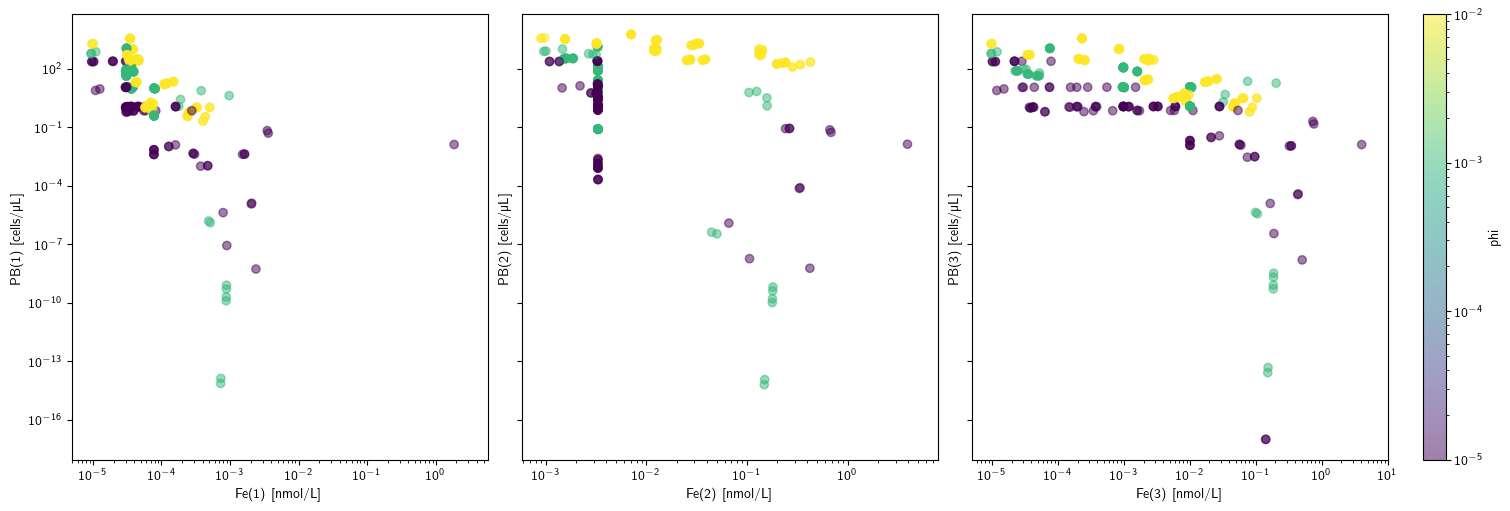

In [14]:
# Create a ListedColormap with the specified colors
custom_cmap = ListedColormap(colors, name='custom_cmap', N=len(colors))

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data['Fe(1)'], data['PB(1)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data['Fe(2)'], data['PB(2)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data['Fe(3)'], data['PB(3)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()


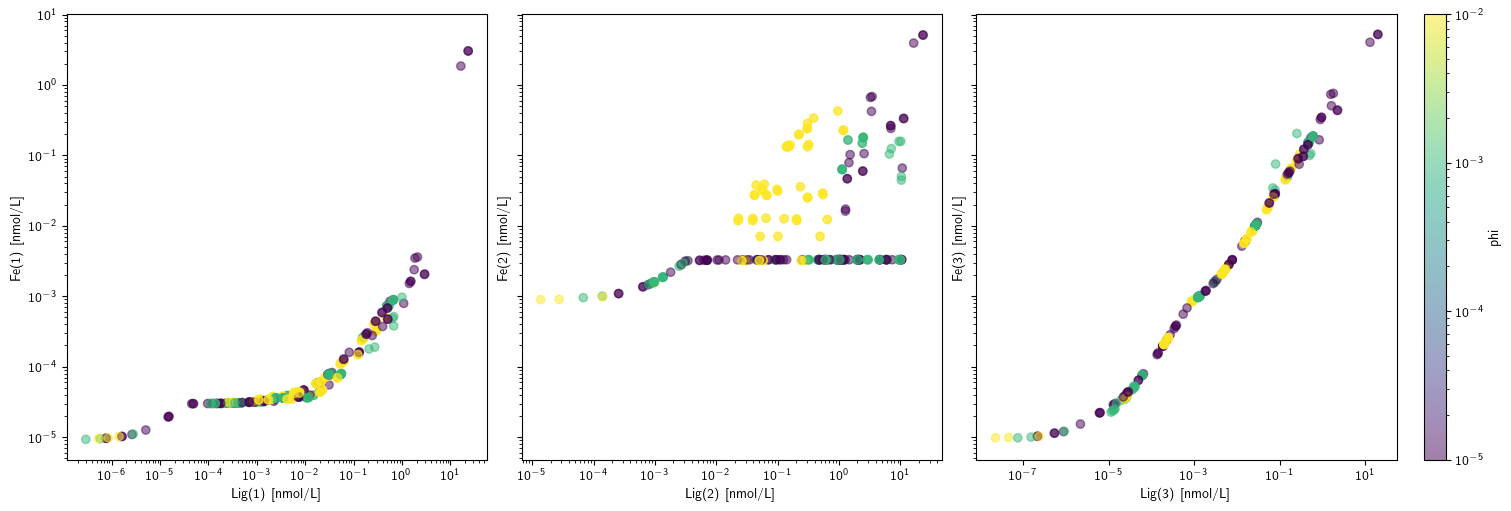

In [15]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data['Lig(1)'], data['Fe(1)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data['Lig(2)'], data['Fe(2)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data['Lig(3)'], data['Fe(3)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()





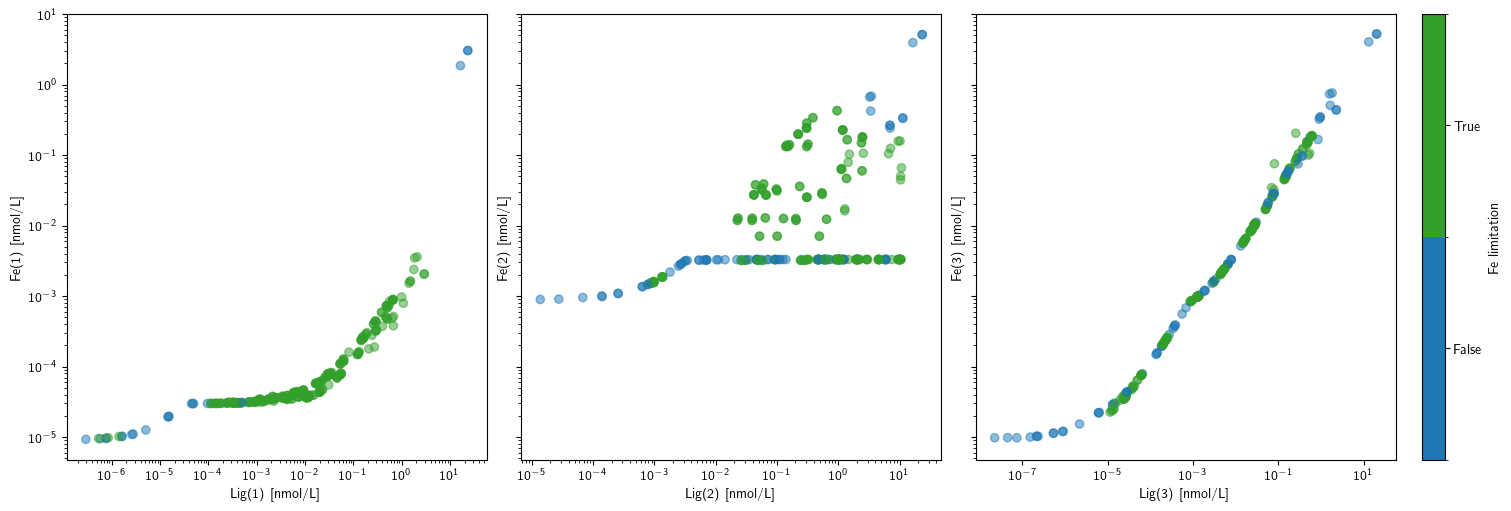

In [16]:
### Scatterplot of Fe(3) vs Lig(3)

custom_cmap = ListedColormap(['#1f78b4', '#33a02c'])
norm = BoundaryNorm([0, 0.5, 1], custom_cmap.N)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data['Lig(1)'], data['Fe(1)'], c=data['fe_lim_p(1)'], cmap=custom_cmap, marker='o', alpha=0.5)
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data['Lig(2)'], data['Fe(2)'], c=data['fe_lim_p(2)'], cmap=custom_cmap, marker='o', alpha=0.5)
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data['Lig(3)'], data['Fe(3)'], c=data['fe_lim_p(3)'], cmap=custom_cmap, marker='o', alpha=0.5)
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

# Create a ScalarMappable
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

# Add colorbar
cbar = plt.colorbar(sm, ax=axs, ticks=[0.25, 0.75], orientation='vertical', pad=0.02)
cbar.set_ticklabels(['False', 'True'])
cbar.set_label('Fe limitation')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()





In [17]:
data['fe_lim_p(1)'].value_counts()

True     292
False     32
Name: fe_lim_p(1), dtype: int64

In [18]:
data['fe_lim_p(2)'].value_counts()

True     243
False     81
Name: fe_lim_p(2), dtype: int64

In [19]:
data['fe_lim_p(3)'].value_counts()

True     229
False     95
Name: fe_lim_p(3), dtype: int64

In [20]:
data['phi'].unique()

array([1.e-05, 1.e-03, 1.e-02])

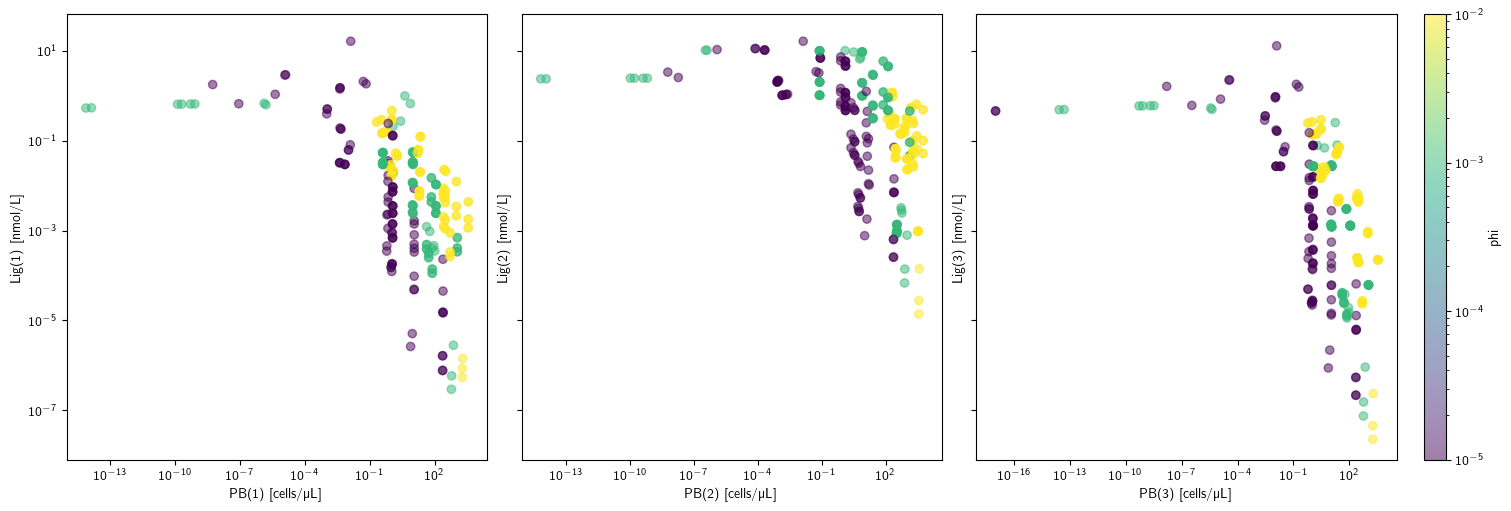

In [21]:
### Scatterplot of PB(3) vs Lig(3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)
sc1 = axs[0].scatter(data['PB(1)'], data['Lig(1)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('PB(1) [cells/µL]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

sc2 = axs[1].scatter(data['PB(2)'], data['Lig(2)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('PB(2) [cells/µL]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

sc3 = axs[2].scatter(data['PB(3)'], data['Lig(3)'], c=data['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('PB(3) [cells/µL]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')



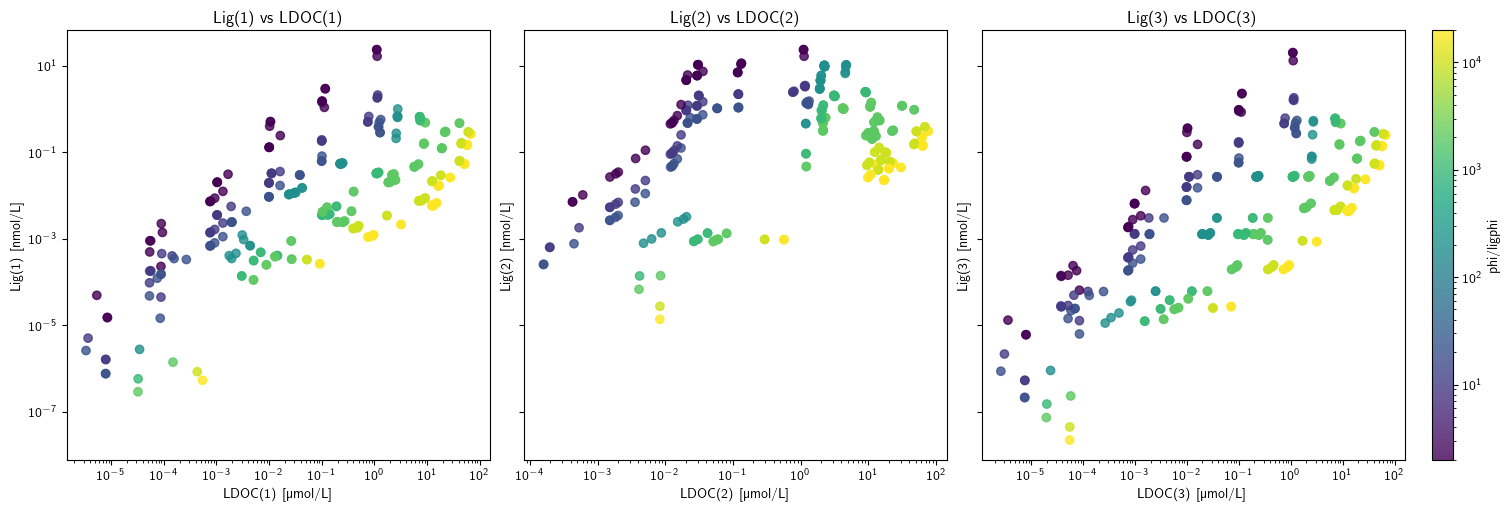

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Lig(1) vs LDOC(1)
scatter1 = axs[0].scatter(data['LDOC(1)'], data['Lig(1)'], c=data['phi']/data['ligphi'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[0].set_xlabel('LDOC(1) [µmol/L]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('Lig(1) vs LDOC(1)')
# axs[0].grid(True)

# Scatter plot for Lig(2) vs LDOC(2)
scatter2 = axs[1].scatter(data['LDOC(2)'], data['Lig(2)'], c=data['phi']/data['ligphi'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[1].set_xlabel('LDOC(2) [µmol/L]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('Lig(2) vs LDOC(2)')
# axs[1].grid(True)

# Scatter plot for Lig(3) vs LDOC(3)
scatter3 = axs[2].scatter(data['LDOC(3)'], data['Lig(3)'], c=data['phi']/data['ligphi'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[2].set_xlabel('LDOC(3) [µmol/L]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Lig(3) vs LDOC(3)')
# axs[2].grid(True)

# Add a colorbar to each subplot
cbar = fig.colorbar(scatter3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi')


# Save or display the plot
#plt.savefig('scientific_paper_plot.png', dpi=300, bbox_inches='tight')
plt.show()


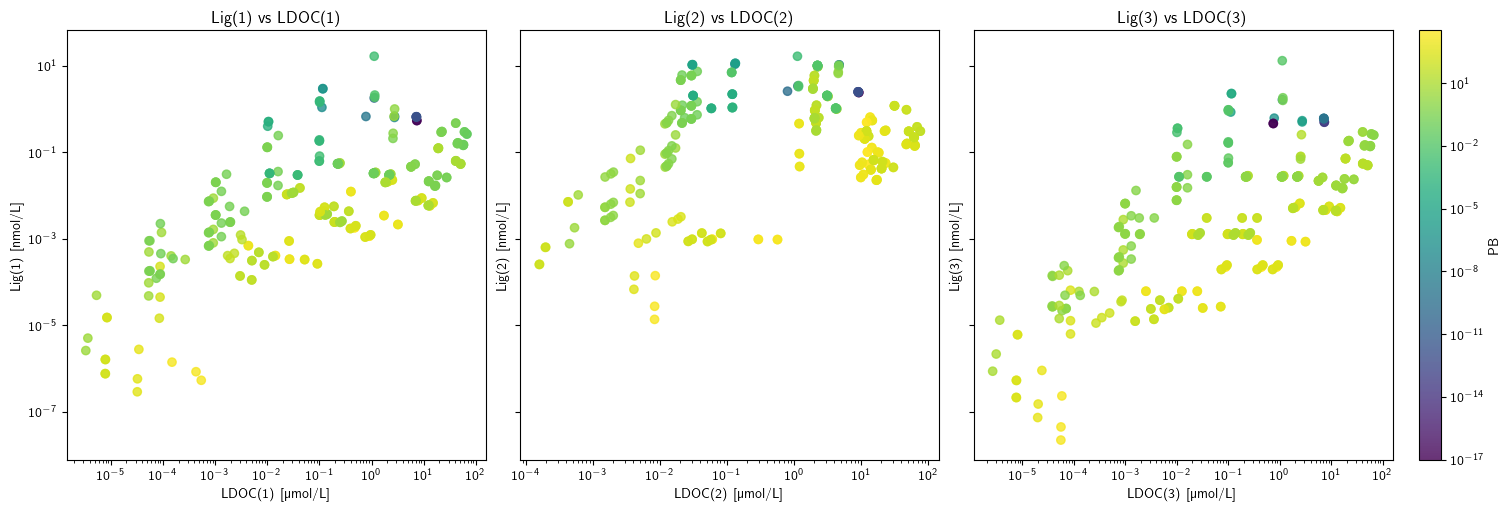

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Lig(1) vs LDOC(1)
scatter1 = axs[0].scatter(data['LDOC(1)'], data['Lig(1)'], c=data['PB(1)'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[0].set_xlabel('LDOC(1) [µmol/L]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('Lig(1) vs LDOC(1)')
# axs[0].grid(True)

# Scatter plot for Lig(2) vs LDOC(2)
scatter2 = axs[1].scatter(data['LDOC(2)'], data['Lig(2)'], c=data['PB(2)'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[1].set_xlabel('LDOC(2) [µmol/L]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('Lig(2) vs LDOC(2)')
# axs[1].grid(True)

# Scatter plot for Lig(3) vs LDOC(3)
scatter3 = axs[2].scatter(data['LDOC(3)'], data['Lig(3)'], c=data['PB(3)'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[2].set_xlabel('LDOC(3) [µmol/L]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Lig(3) vs LDOC(3)')
# axs[2].grid(True)

# Add a colorbar to each subplot
cbar = fig.colorbar(scatter3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('PB')


# Save or display the plot
#plt.savefig('scientific_paper_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# Ensemble 10 -- beta = 1E12

In [24]:
### Ensemble 10
### Including prokaryotes and trying different parameter combinations of µ0, m_l, m_q, kldoc_p, phi and ligphi
### Duration: 10000 years
### beta = 1E12
### 324 runs

In [25]:
os.getcwd()

'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble9'

In [26]:
os.chdir('C:/Users/konst/Documents/_Master_Thesis/Code/microCOSM_deep/Ensemble10')

In [27]:
os.getcwd()

'C:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble10'

In [28]:
data10 = pd.read_csv('Ensemble10.csv', sep=' ')

In [29]:
### Add column

data10['fe_lim_p(1)'] = (data10['Fe(1)'] / (data10['Fe(1)'] + data10['kfe_p'] * 1e6)) / (data10['LDOC(1)'] / (data10['LDOC(1)'] + data10['kldoc_p'] * 1e3)) < 1
data10['fe_lim_p(2)'] = (data10['Fe(2)'] / (data10['Fe(2)'] + data10['kfe_p'] * 1e6)) / (data10['LDOC(2)'] / (data10['LDOC(2)'] + data10['kldoc_p'] * 1e3)) < 1
data10['fe_lim_p(3)'] = (data10['Fe(3)'] / (data10['Fe(3)'] + data10['kfe_p'] * 1e6)) / (data10['LDOC(3)'] / (data10['LDOC(3)'] + data10['kldoc_p'] * 1e3)) < 1

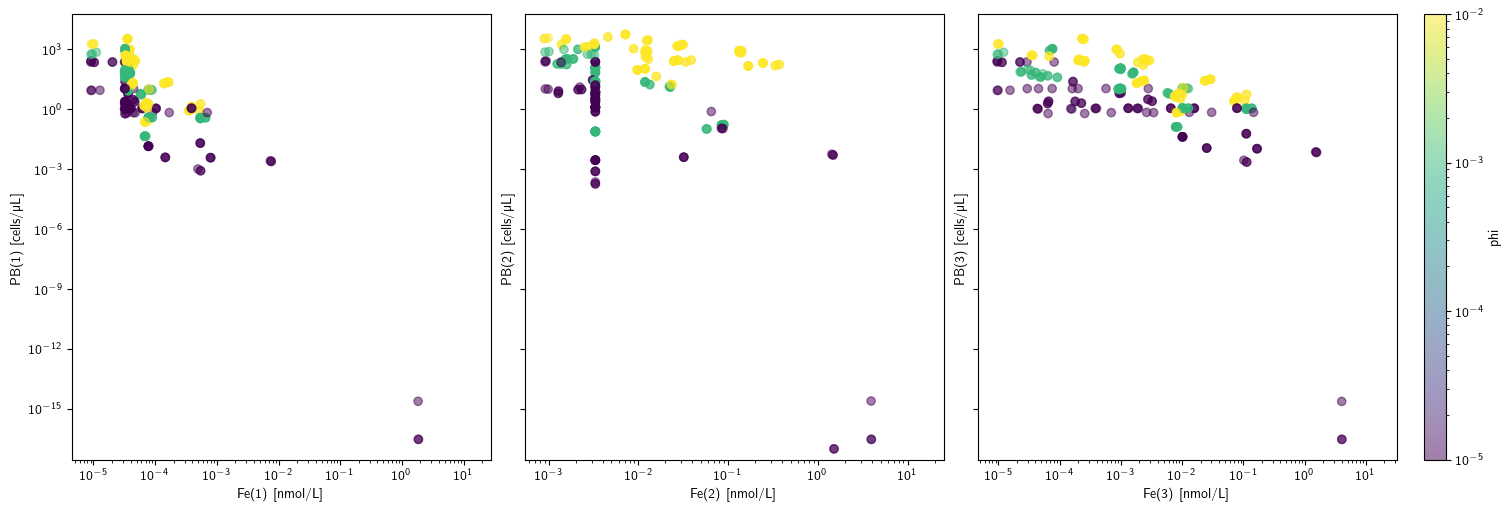

In [30]:
# Create a ListedColormap with the specified colors
custom_cmap = ListedColormap(colors, name='custom_cmap', N=len(colors))

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data10['Fe(1)'], data10['PB(1)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data10['Fe(2)'], data10['PB(2)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data10['Fe(3)'], data10['PB(3)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()


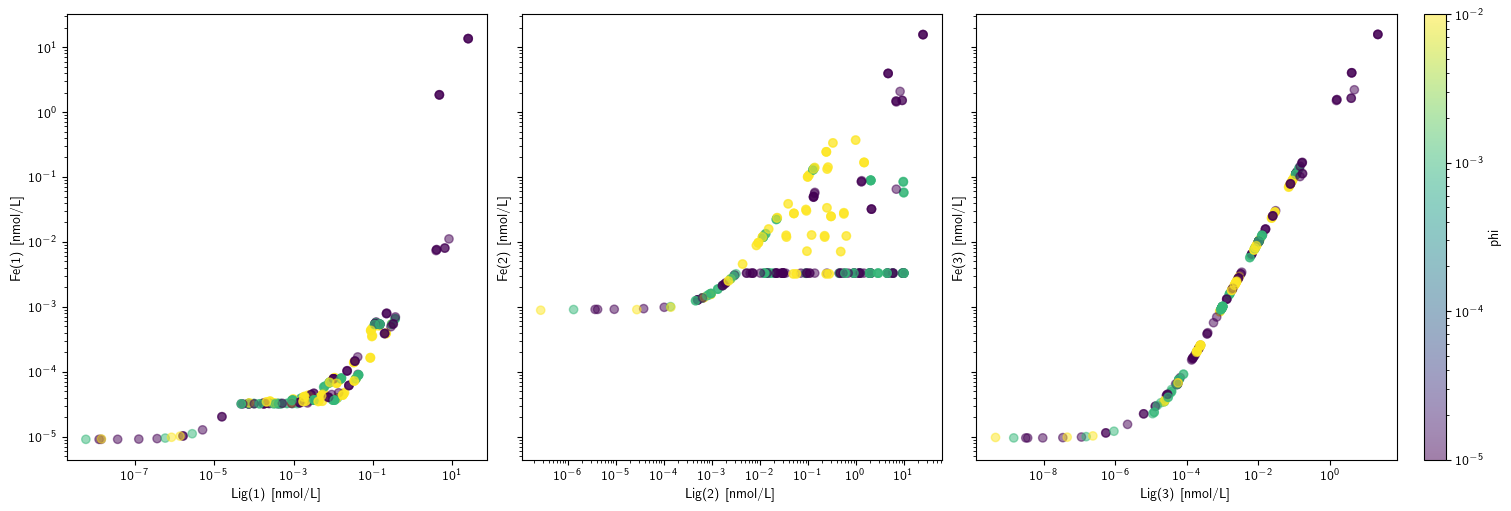

In [31]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data10['Lig(1)'], data10['Fe(1)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data10['Lig(2)'], data10['Fe(2)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data10['Lig(3)'], data10['Fe(3)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()





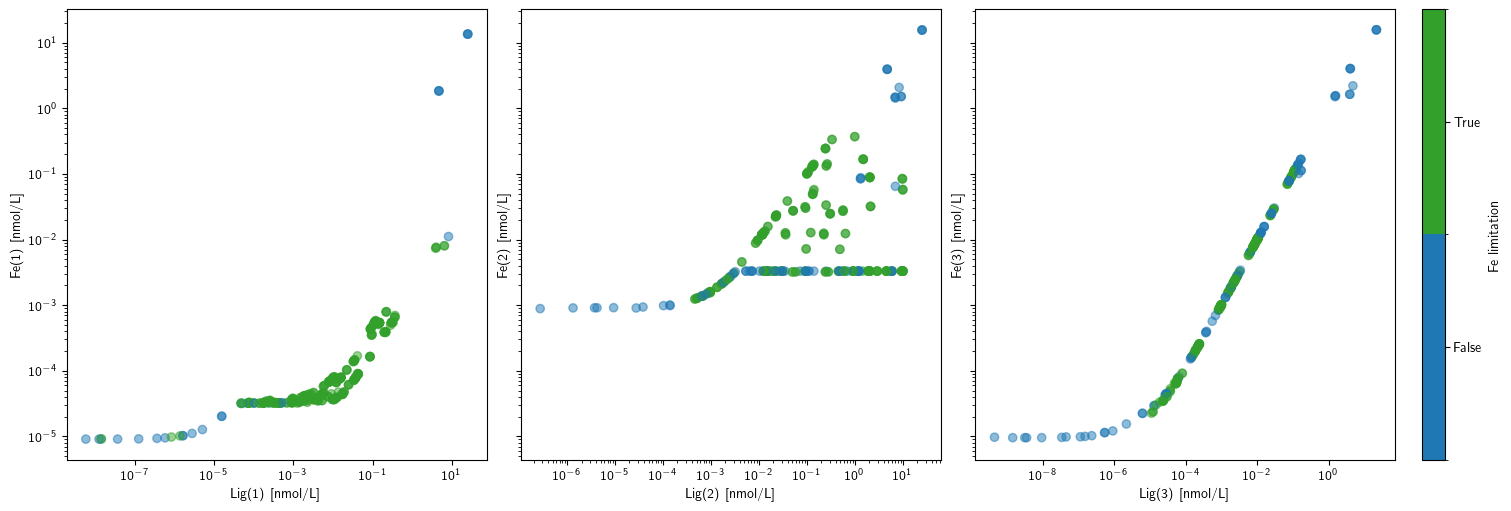

In [32]:
### Scatterplot of Fe(3) vs Lig(3)

custom_cmap = ListedColormap(['#1f78b4', '#33a02c'])
norm = BoundaryNorm([0, 0.5, 1], custom_cmap.N)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data10['Lig(1)'], data10['Fe(1)'], c=data10['fe_lim_p(1)'], cmap=custom_cmap, marker='o', alpha=0.5)
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data10['Lig(2)'], data10['Fe(2)'], c=data10['fe_lim_p(2)'], cmap=custom_cmap, marker='o', alpha=0.5)
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data10['Lig(3)'], data10['Fe(3)'], c=data10['fe_lim_p(3)'], cmap=custom_cmap, marker='o', alpha=0.5)
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

# Create a ScalarMappable
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

# Add colorbar
cbar = plt.colorbar(sm, ax=axs, ticks=[0.25, 0.75], orientation='vertical', pad=0.02)
cbar.set_ticklabels(['False', 'True'])
cbar.set_label('Fe limitation')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()





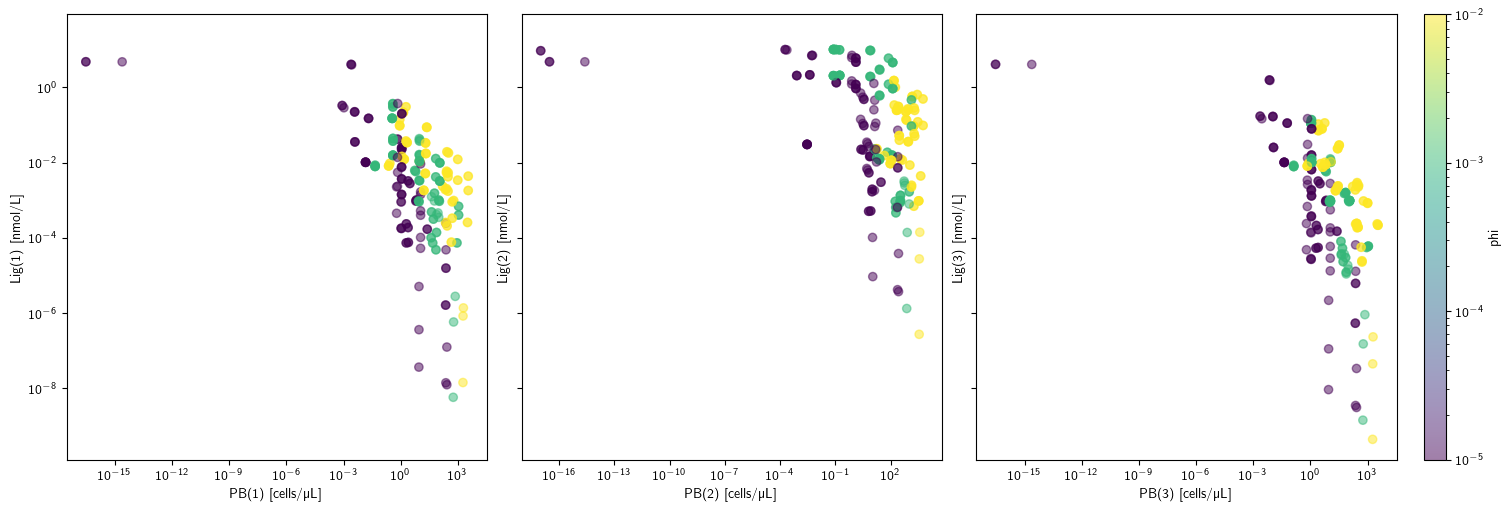

In [33]:
### Scatterplot of PB(3) vs Lig(3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)
sc1 = axs[0].scatter(data10['PB(1)'], data10['Lig(1)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('PB(1) [cells/µL]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

sc2 = axs[1].scatter(data10['PB(2)'], data10['Lig(2)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('PB(2) [cells/µL]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

sc3 = axs[2].scatter(data10['PB(3)'], data10['Lig(3)'], c=data10['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('PB(3) [cells/µL]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')



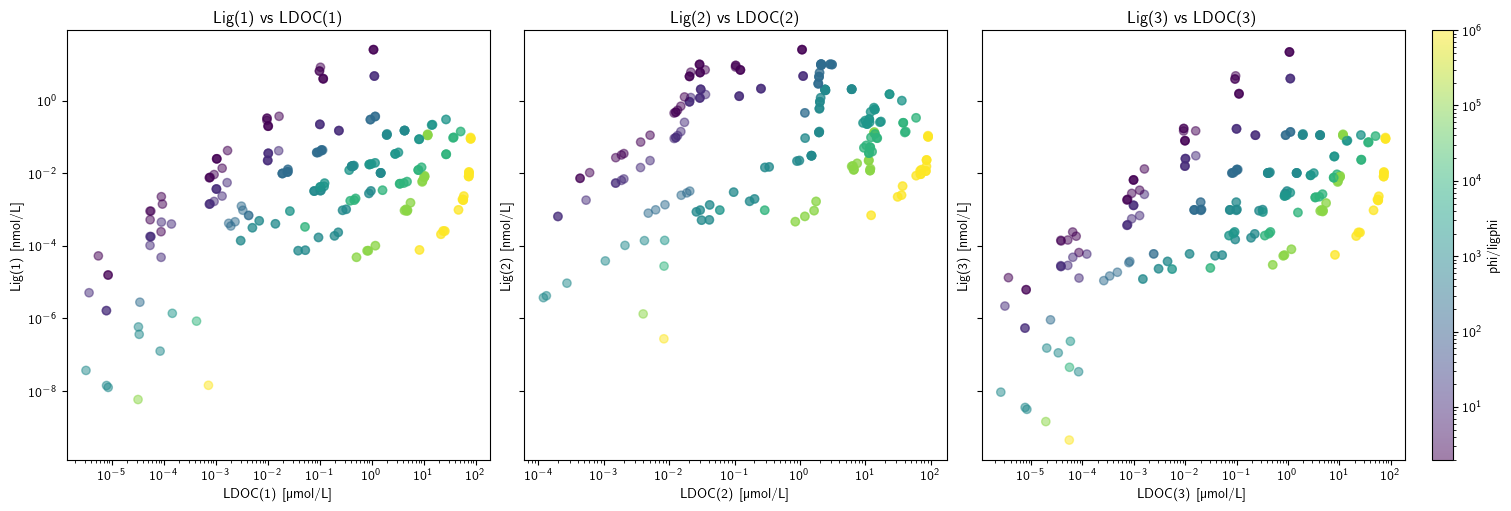

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Lig(1) vs LDOC(1)
scatter1 = axs[0].scatter(data10['LDOC(1)'], data10['Lig(1)'], c=data10['phi']/data10['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('LDOC(1) [µmol/L]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('Lig(1) vs LDOC(1)')
# axs[0].grid(True)

# Scatter plot for Lig(2) vs LDOC(2)
scatter2 = axs[1].scatter(data10['LDOC(2)'], data10['Lig(2)'], c=data10['phi']/data10['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('LDOC(2) [µmol/L]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('Lig(2) vs LDOC(2)')
# axs[1].grid(True)

# Scatter plot for Lig(3) vs LDOC(3)
scatter3 = axs[2].scatter(data10['LDOC(3)'], data10['Lig(3)'], c=data10['phi']/data10['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('LDOC(3) [µmol/L]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Lig(3) vs LDOC(3)')
# axs[2].grid(True)

# Add a colorbar to each subplot
cbar = fig.colorbar(scatter3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi')


# Save or display the plot
#plt.savefig('scientific_paper_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# Ensemble 9 and 10 comparison

Add a rectangluar region of the allowed values to the plots

In [35]:
data9 = data

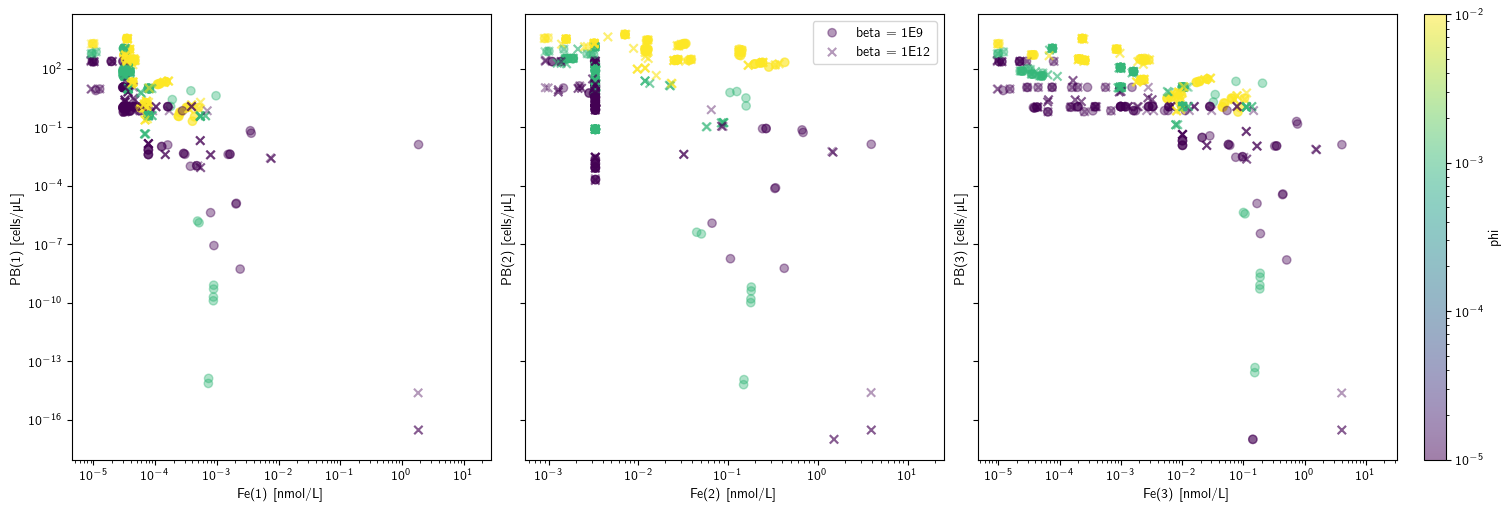

In [36]:
# Create a ListedColormap with the specified colors
custom_cmap = ListedColormap(colors, name='custom_cmap', N=len(colors))

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1_9 = axs[0].scatter(data9['Fe(1)'], data9['PB(1)'], c=data9['phi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label='beta = 1E9')
sc1_10 = axs[0].scatter(data10['Fe(1)'], data10['PB(1)'], c=data10['phi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label='beta = 1E12')

axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2_9 = axs[1].scatter(data9['Fe(2)'], data9['PB(2)'], c=data9['phi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label='beta = 1E9')
sc2_10 = axs[1].scatter(data10['Fe(2)'], data10['PB(2)'], c=data10['phi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label='beta = 1E12')

axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

# Scatter plot for Fe(3) vs PB(3)
sc3_9 = axs[2].scatter(data9['Fe(3)'], data9['PB(3)'], c=data9['phi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label='beta = 1E9')
sc3_10 = axs[2].scatter(data10['Fe(3)'], data10['PB(3)'], c=data10['phi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label='beta = 1E12')

axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')



cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()


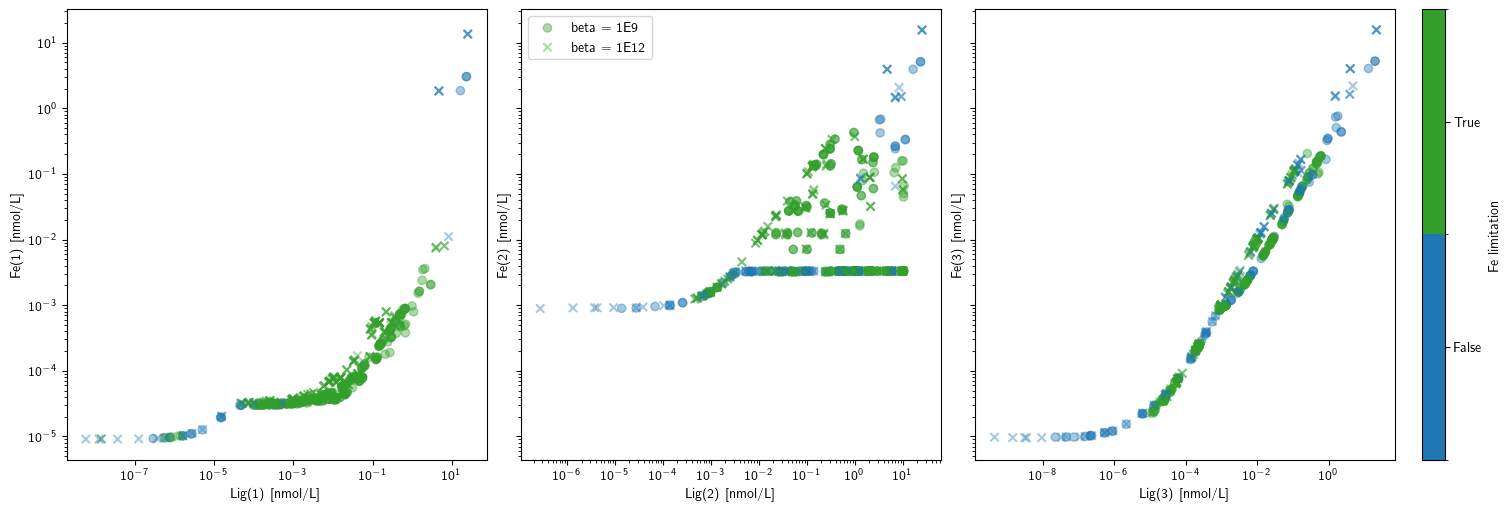

In [37]:
### Scatterplot of Fe(3) vs Lig(3)

custom_cmap = ListedColormap(['#1f78b4', '#33a02c'])
norm = BoundaryNorm([0, 0.5, 1], custom_cmap.N)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1_9 = axs[0].scatter(data9['Lig(1)'], data9['Fe(1)'], c=data9['fe_lim_p(1)'], cmap=custom_cmap, marker='o', alpha=0.4, label='beta = 1E9')
sc1_10 = axs[0].scatter(data10['Lig(1)'], data10['Fe(1)'], c=data10['fe_lim_p(1)'], cmap=custom_cmap, marker='x', alpha=0.4, label='beta = 1E12')
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

# Scatter plot for Fe(2) vs PB(2)
sc2_9 = axs[1].scatter(data9['Lig(2)'], data9['Fe(2)'], c=data9['fe_lim_p(2)'], cmap=custom_cmap, marker='o', alpha=0.4, label='beta = 1E9')
sc2_10 = axs[1].scatter(data10['Lig(2)'], data10['Fe(2)'], c=data10['fe_lim_p(2)'], cmap=custom_cmap, marker='x', alpha=0.4, label='beta = 1E12')
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

# Scatter plot for Fe(3) vs PB(3)
sc3_9 = axs[2].scatter(data9['Lig(3)'], data9['Fe(3)'], c=data9['fe_lim_p(3)'], cmap=custom_cmap, marker='o', alpha=0.4, label='beta = 1E9')
sc3_10 = axs[2].scatter(data10['Lig(3)'], data10['Fe(3)'], c=data10['fe_lim_p(3)'], cmap=custom_cmap, marker='x', alpha=0.4, label='beta = 1E12')
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

# Create a ScalarMappable
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

# Add colorbar
cbar = plt.colorbar(sm, ax=axs, ticks=[0.25, 0.75], orientation='vertical', pad=0.02)
cbar.set_ticklabels(['False', 'True'])
cbar.set_label('Fe limitation')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()





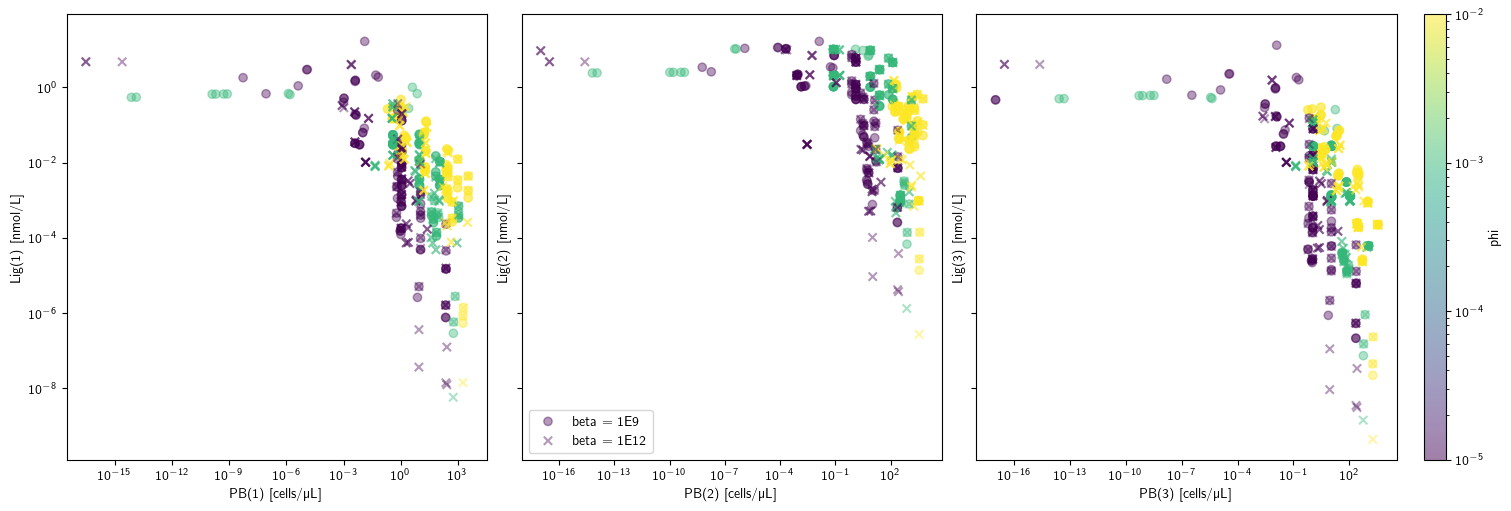

In [38]:
### Scatterplot of PB(3) vs Lig(3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)
sc1_9 = axs[0].scatter(data9['PB(1)'], data9['Lig(1)'], c=data9['phi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label='beta = 1E9')
sc1_10 = axs[0].scatter(data10['PB(1)'], data10['Lig(1)'], c=data10['phi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label='beta = 1E12')
axs[0].set_xlabel('PB(1) [cells/µL]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

sc2_9 = axs[1].scatter(data9['PB(2)'], data9['Lig(2)'], c=data9['phi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label='beta = 1E9')
sc2_10 = axs[1].scatter(data10['PB(2)'], data10['Lig(2)'], c=data10['phi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label='beta = 1E12')
axs[1].set_xlabel('PB(2) [cells/µL]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

sc3_9 = axs[2].scatter(data9['PB(3)'], data9['Lig(3)'], c=data9['phi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label='beta = 1E9')
sc3_10 = axs[2].scatter(data10['PB(3)'], data10['Lig(3)'], c=data10['phi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label='beta = 1E12')
axs[2].set_xlabel('PB(3) [cells/µL]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')



AttributeError: 'list' object has no attribute 'get_array'

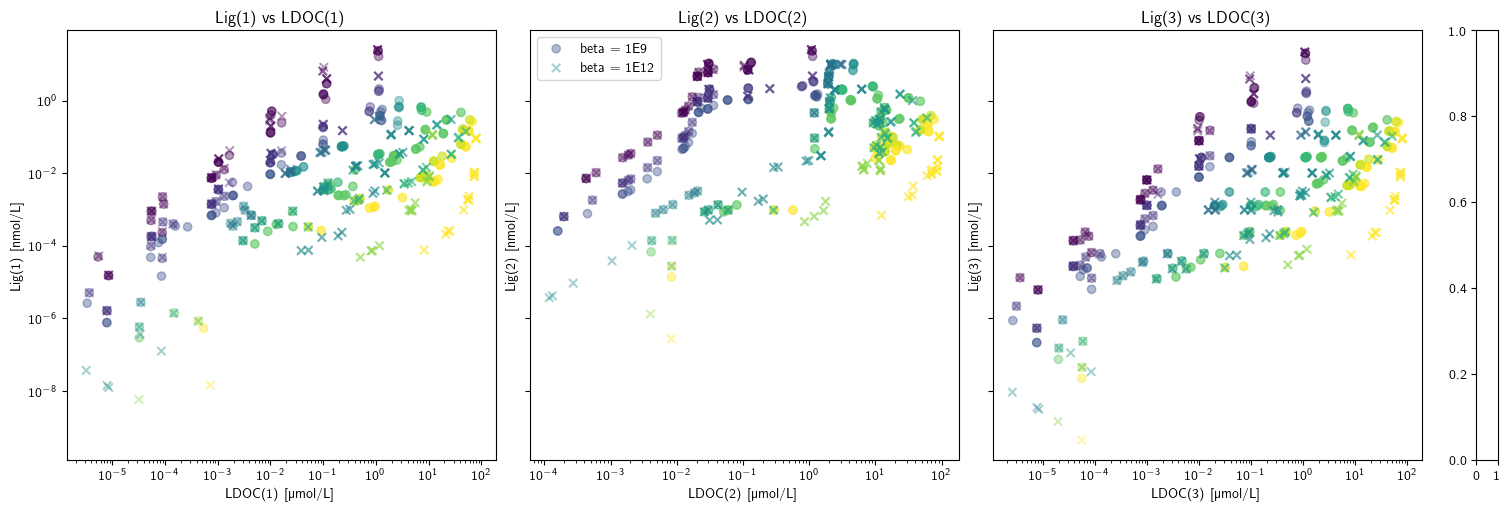

In [41]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, constrained_layout=True)

# Scatter plot for Lig(1) vs LDOC(1)
sc1_9 = axs[0].scatter(data9['LDOC(1)'], data9['Lig(1)'], c=data9['phi']/data9['ligphi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label = 'beta = 1E9')
sc1_10 = axs[0].scatter(data10['LDOC(1)'], data10['Lig(1)'], c=data10['phi']/data10['ligphi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label = 'beta = 1E12')
axs[0].set_xlabel('LDOC(1) [µmol/L]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('Lig(1) vs LDOC(1)')
# axs[0].grid(True)

# Scatter plot for Lig(2) vs LDOC(2)
sc2_9 = axs[1].scatter(data9['LDOC(2)'], data9['Lig(2)'], c=data9['phi']/data9['ligphi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label = 'beta = 1E9')
sc2_10 = axs[1].scatter(data10['LDOC(2)'], data10['Lig(2)'], c=data10['phi']/data10['ligphi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label = 'beta = 1E12')
axs[1].set_xlabel('LDOC(2) [µmol/L]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('Lig(2) vs LDOC(2)')
axs[1].legend()
# axs[1].grid(True)

# Scatter plot for Lig(3) vs LDOC(3)
sc3_9 = axs[2].scatter(data9['LDOC(3)'], data9['Lig(3)'], c=data9['phi']/data9['ligphi'], cmap='viridis', marker='o', alpha=0.4, norm=LogNorm(), label = 'beta = 1E9')
sc3_10 = axs[2].scatter(data10['LDOC(3)'], data10['Lig(3)'], c=data10['phi']/data10['ligphi'], cmap='viridis', marker='x', alpha=0.4, norm=LogNorm(), label = 'beta = 1E12')
axs[2].set_xlabel('LDOC(3) [µmol/L]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title('Lig(3) vs LDOC(3)')
# axs[2].grid(True)

# Add a colorbar to each subplot
### Different phi/ligphi values, need a shared colorbar that respects both datasets!!!
cbar = fig.colorbar([sc3_9, sc3_10], ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi')


# Save or display the plot
#plt.savefig('scientific_paper_plot.png', dpi=300, bbox_inches='tight')
plt.show()
